## 모델 성능 평가

### 분류 모델의 평가 지표
: 예측 대상이 범주형 데이터인 경우

- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- G measure
- **ROC curve**
- AUC

### 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
- MSE(Mean Square Error)
- RMSE(Root Mean Square Error)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- R^2

## 분류 모델의 성능 평가 지표
## Accuracy(정확도)
- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- 정확도 = 예측결과가 동일한 데이터건수 / 전체 예측 데이터건수

---

## 1. 타이타닉 생존자 예측

In [5]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는
# 단순한 Classifier 생성
# BaseEstimator 상속 받음

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i] = 0 
            else:
                pred[i] = 1
        return pred

In [6]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(x_titanic_df,
                                                   y_titanic_df,
                                                   test_size=0.2,
                                                   random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
mypred = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test,mypred)))

Dummy Classifier의 정확도는 : 0.7877


---

## MNIST 데이터 세트
- 0~9까지의 숫자 이미지의 픽셀 정보를 가지고 있고 이를 기반으로 숫자 Digit을 예측하는데 사용

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X,y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    

Digit 데이터 로드

In [10]:
# digits 확인
digits = load_digits()

# digits

In [13]:
digits.data.shape
digits.target.shape

(1797,)

7인 데이터 확인

In [14]:
digits.target == 7

array([False, False, False, ..., False, False, False])

7인 데이터는 1, 그 외 데이터는 0으로 변환

In [15]:
y = (digits.target == 7).astype(int)

학습/테스트 데이터 세트로 분리(default=0.25)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   y,
                                                   random_state=11)


In [24]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [25]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [26]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 불균형한 레이블 데이터 분포도 확인

In [29]:
print(y_test.shape)
pd.Series(y_test).value_counts()

(450,)


0    405
1     45
dtype: int64

In [31]:
# MyFakeClassifier로 학습/예측/정확도 평가
fake_cl = MyFakeClassifier()
fake_cl.fit(X_train, y_train)
fakePred = fake_cl.predict(X_test)
accuracy = accuracy_score(y_test,fakePred)
print('정확도 : ',np.round(accuracy,3))

정확도 :  0.9


confusion_matrix(오차행렬)  
[TN,FP  
FN,TP]

In [32]:
from sklearn.metrics import confusion_matrix
# MNIST의 fakepred
confusion_matrix(y_test, fakePred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### ***정확도의 맹점으로 정밀도와 재현율을 봐야한다!**
- 정밀도 = TP / (FP+TP)
- 재현율 = TP / (FN+TP)

정밀도와 재현율은 상호보완적

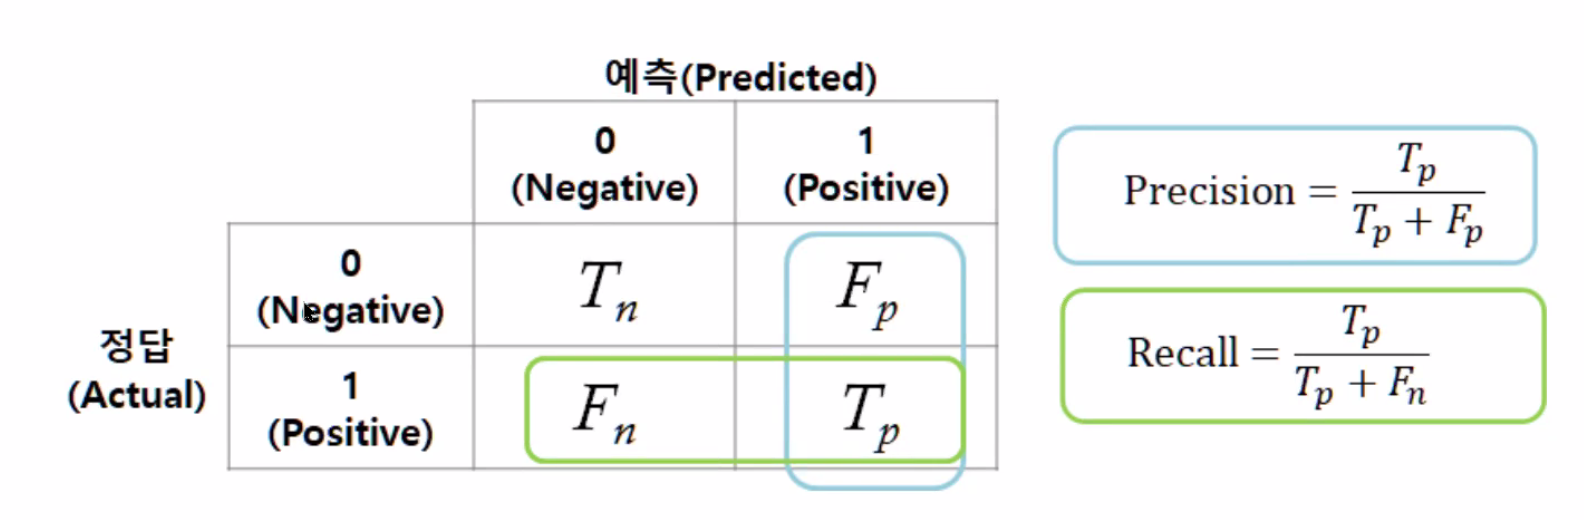

사이킷런 API사용
- 정밀도 계산 : precision_score()
- 재현율 계산 : recall_score()
- 오차행렬 : confusion_matrix()

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X,y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

digits = load_digits()
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   y,
                                                   random_state=11)
fake_clf= MyFakeClassifier()
fake_clf.fit(X_train,y_train)
fakepred = fake_clf.predict(X_test)

In [35]:
fakepred.astype(int).sum()

0

정확도로만 보지 않아야되는 이유!

In [37]:
# 정밀도와 재현율 계산
# 정밀도 계산 : precision_score(실제값, 예측값)
# 재현율 계산 : recall_score(실제값, 예측값)
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도 : ',precision_score(y_test, fakepred))
print('재현율 : ',recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\ananconda\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred) # 오차행렬
    accuracy = accuracy_score(y_test,pred)    # 정확도
    precision = precision_score(y_test,pred)  # 정밀도
    recall = recall_score(y_test,pred)        # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}\n정밀도 : {1:.3f}\n재현율 : {2:.3f}'.format(accuracy,precision,recall))

In [42]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
x_titanic_df = transform_features(x_titanic_df)


X_train, X_test, y_train, y_test = train_test_split(x_titanic_df,
                                                   y_titanic_df,
                                                   test_size=0.2,
                                                   random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train) # 학습
lr_pred = lr_clf.predict(X_test) # 예측
get_clf_eval(y_test,lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849
정밀도 : 0.774
재현율 : 0.787


C:\ananconda\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Precision/Recall Trade-off
정밀도 / 재현율 트레이드 오프
- 업무에 따라 정밀도/재현율 중요도 다름
- 분류의 결정 **임계값(Threshold)** 을 조정해서 정밀도 또는 재현율의 수치를 높일 수 있음

### predict_proba() 메소드

In [44]:
# proba -> 예측확률반환
# 왼쪽은 0의 확률 오른쪽은 1의 확률
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.46170212, 0.53829788],
       [0.87864222, 0.12135778],
       [0.87728507, 0.12271493],
       [0.88283607, 0.11716393],
       [0.85513868, 0.14486132],
       [0.88231278, 0.11768722],
       [0.88840176, 0.11159824],
       [0.20920049, 0.79079951],
       [0.78263398, 0.21736602],
       [0.36988991, 0.63011009]])

In [47]:
# predict : 예측 결과 클래스 값 반환
pred = lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [49]:
# 예측 확률 array와 예측 결과값 array를 concatenate 하여 예측확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 주에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result[:10])

두개의 class 주에서 더 큰 확률을 클래스 값으로 예측
[[0.46170212 0.53829788 1.        ]
 [0.87864222 0.12135778 0.        ]
 [0.87728507 0.12271493 0.        ]
 [0.88283607 0.11716393 0.        ]
 [0.85513868 0.14486132 0.        ]
 [0.88231278 0.11768722 0.        ]
 [0.88840176 0.11159824 0.        ]
 [0.20920049 0.79079951 1.        ]
 [0.78263398 0.21736602 0.        ]
 [0.36988991 0.63011009 1.        ]]


---

### Binarizer클래스 이용 예측값 변환 예제
- threshold 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform()메서들르 이용해서
- 넘파이 ndarray 입력 값을 지정된 threshold보다 같거나 작으면 0값으로,
- 크면 1값으로 변환해서 반환

In [51]:
from sklearn.preprocessing import Binarizer

X= [[0.5,-1,2],[2,0,0],[0,1.1,1.2]]

binarizer = Binarizer(threshold=1.5)
print(binarizer.fit_transform(X))


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


#### 분류 결정 임계값 0.5기반에서 Binarizer를 이용하여 예측값 변환

In [52]:
c_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849
정밀도 : 0.774
재현율 : 0.787


#### 분류 결정 임계값을 0.4로 변경
- 임계값을 낮추니까 **정밀도**는 떨어지고 **재현율** 값은 올라감

In [53]:
c_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

# 임계값을 낮추니까 정밀도는 떨어지고 재현율 값은 올라감
get_clf_eval(y_test, custom_predict)

오차행렬
[[99 19]
 [10 51]]
정확도 : 0.838
정밀도 : 0.729
재현율 : 0.836


#### 여러개의 분류 결정 임곗값을 변경하면서 Binarizer을 이용하여 예측

In [69]:
thresholds=[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

임곗값에 따른 정밀도-재현율 값 추출
- precision_recall_curve()를 이용
- return 정밀도 재현율 

In [60]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일때의 예측 확률을 precision_recall_curve()의 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('임계값 shape : ',thresholds.shape)
print('정밀도 shape : ',precisions.shape)
print('재현율 shape : ',recalls.shape)

idx = np.arange(0,thresholds.shape[0],15)
print("sample index : ", idx)
print('임계값 sample : ',np.round(thresholds[idx],3))
print('정밀도 sample : ',np.round(precisions[idx],3))
print('재현율 sample : ',np.round(recalls[idx],3))

임계값 shape :  (143,)
정밀도 shape :  (144,)
재현율 shape :  (144,)
sample index :  [  0  15  30  45  60  75  90 105 120 135]
임계값 sample :  [0.104 0.121 0.14  0.187 0.281 0.404 0.565 0.667 0.822 0.947]
정밀도 sample :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 sample :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


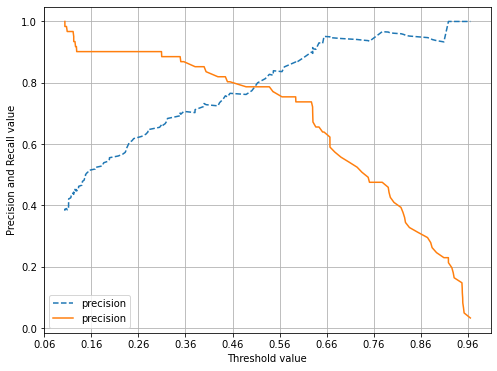

In [65]:
# 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary= thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='precision')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

정밀도와 재현율 조합
- Positive 예측의 임계값에 따라 정밀도와 재현율 수치가 변경
- 임계값은 업무 환경에 맞게 정밀도와 재현율의 수치를 상호보완

---

## F1 Score
- 정밀도와 재현율의 조화평균
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않은 수치를 나타낼 때 상대적으로 높은 값을 가짐

#### 예 : 두 예측 모델 비교  
A예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1
- F1스코어 : 0.18

B예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5
- F1스코어:0.5

B모델의 F1스코어가 A모델에 비해 매우 우수

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred) # 오차행렬
    accuracy = accuracy_score(y_test,pred)    # 정확도
    precision = precision_score(y_test,pred)  # 정밀도
    recall = recall_score(y_test,pred)        # 재현율
    
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.3f}\n'.format(accuracy,precision,recall,f1))

In [76]:
thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차행렬
[[99 19]
 [10 51]]
정확도 : 0.838, 정밀도 : 0.729, 재현율 : 0.836, F1 : 0.779

임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849, 정밀도 : 0.766, 재현율 : 0.803, F1 : 0.784

임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787, F1 : 0.780

임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866, 정밀도 : 0.836, 재현율 : 0.754, F1 : 0.793

임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877, 정밀도 : 0.882, 재현율 : 0.738, F1 : 0.804



---

## G measuere
- 정말도와 재현율의 기하평균
- G = root(Precision * Recall)

---

## ROC Curve와 AUC

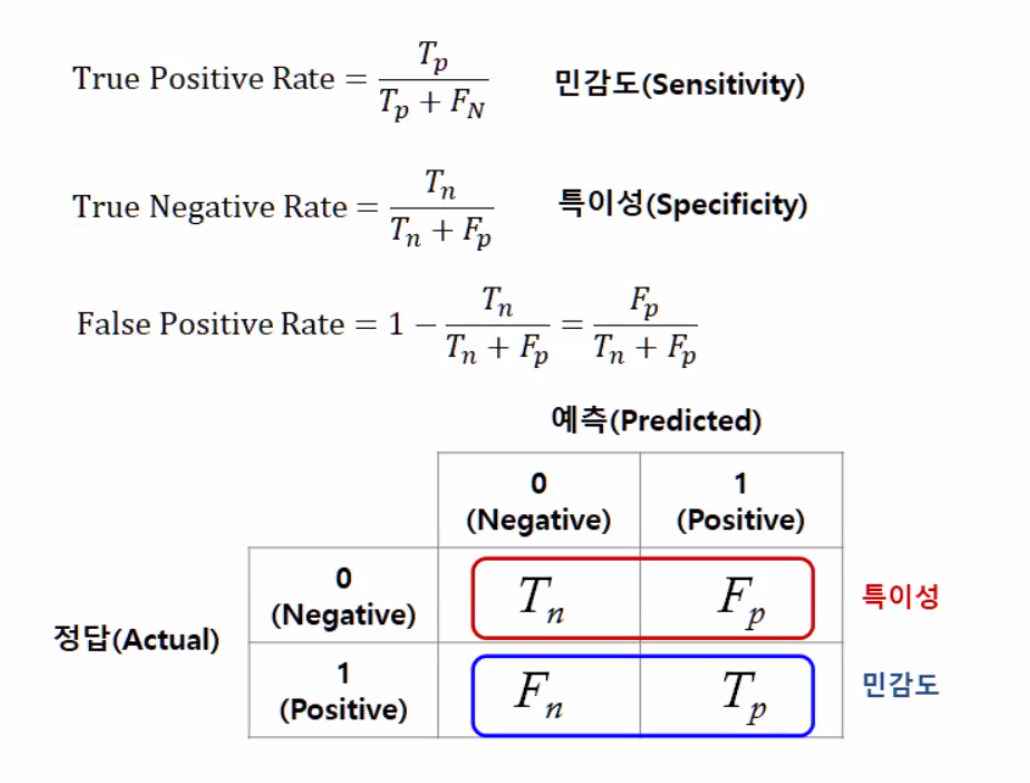

참고 : https://hsm-edu.tistory.com/1033

In [79]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# fpr : 재현율 / tpr : 1-특이도
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index : ',thr_index)
print('샘플용 임곗값:', np.round(thresholds[thr_index],2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 임곗값: [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]



### FPR의 변화에 따른 TPR의 변화를 ROC곡선 시각화

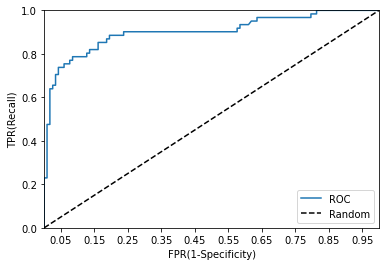

In [86]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, pred_proba[:,-1])
    

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred) # 오차행렬
    accuracy = accuracy_score(y_test,pred)    # 정확도
    precision = precision_score(y_test,pred)  # 정밀도
    recall = recall_score(y_test,pred)        # 재현율
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 (0.5~1 / 1에 가까울수록 좋다)
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    print('오차행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.3f}, AUC:{4:.3f}\n'.format(accuracy,precision,recall,f1,roc_auc))